# Séance 3 – 14/10/2020

## Exceptions

* Les exceptions sont utilisées pour signaler que quelque chose d'anormal se produit, une erreur généralement

* Les messages d'erreur générés par les exceptions donnent des détails précieux sur les erreurs (type, emplacement, ...)

* Vous pouvez générer vos propres exceptions avec `raise`

Revenons sur les listes de Swadesh des langues austronésiennes.

In [ ]:
import collections
import csv

def get_austro_words(lang1, lang2, words, file="data/austronesian_swadesh.csv"):
    """
    Exo 1
    Reçoit un couple de langues (langue1, langue2) et une liste de mots (words)
    Cherche dans la liste Swadesh des langues austronésiennes les traductions des mots
    dans ces deux langues.
    Renvoie un dictionnaire {'langue1': [w1, w2], 'langue2': [w1, w2]}
    Exception si la langue n'est pas répertoriée dans la liste
    """
    res = collections.defaultdict(list)
    with open(file) as swadesh:
        reader = csv.DictReader(swadesh)
        if not (lang1 in reader.fieldnames):
            raise ValueError(f"{lang1} ne fait pas partie des langues de la liste.")

In [ ]:
get_austro_words('Hongrois', 'Tagalog', ['new', 'old', 'good'])

### Capturer les exceptions

* Si elles sont levées par Python vous pouvez capturer les exceptions (`try`, `except`) et modifier le comportement de votre script en fonction

In [ ]:
val = [1, 2 ,3]
try:
    # votre code
    print(val[1984])
except IndexError:
    # code exécuté en cas d'exception
    print("Erreur d'indice. Mais le roman est bien")

* Facile à condition de sélectionner la bonne classe d'exception

In [ ]:
dico = {'michel': 'H', 'michèle': 'F'}
try:
  print(dico[1984])
except IndexError:
  print("Erreur d'indice. Mais le roman est bien")

* Les exceptions Python sont organisées en hiérarchie (voir [ici](https://docs.python.org/3/library/exceptions.html#bltin-exceptions)), on finit par s'y retrouver
* Utiliser la classe mère `Exception` réduit la précision de l'information sur l'erreur produite

In [ ]:
l = []
try:
    print(dico[l[5]])
except Exception:
  print("Soit la clé n'existe pas, soit l'indice n'existe pas")

* Il est possible de capturer plusieurs types d'exceptions différentes

In [ ]:
l = [1,2,3,4,5]
try:
  print(dico[l[5]])
except IndexError:
  print("L'indice n'existe pas")
except KeyError:
  print("La clé n'existe pas")

## Pour finir sur les exceptions

* Le bloc `else` sera exécuté si aucune exception n'est levée

* Le bloc `finally` sera exécuté dans tous les cas de figure

In [ ]:
l = [1,2,3,4,5,0]
try:
  print(dico[l[5]])
except IndexError:
  print("L'indice n'existe pas")
except KeyError:
  print("La clé n'existe pas")
else:
  print("OK tout roule")
finally:
  print("C'est fini, vous pouvez rentrer")

### ✍️  Exo ✍️

Modifiez le code de votre fonction `get_austro_words` et vérifiez qu'elle envoie bien une exception de la classe ValueError si la langue n'existe pas.

In [ ]:
!python corrections/austro.py

## Module argparse

* [`sys.argv`](https://docs.python.org/3/library/sys.html#sys.argv) permet de récupérer la liste des arguments passés à un script Python

* Le module [`argparse`](https://docs.python.org/3/library/argparse.html) est un parseur qui vous permettra de construire des interfaces en ligne de commande plus riches et plus simples à utiliser.  
Commencer avec le [tutorial](https://docs.python.org/3/howto/argparse.html)


In [ ]:
import argparse


# Typiquement les instructions qu'on met dans la fonction main()
parser = argparse.ArgumentParser(description="Mots dans la liste de Swadesh")
parser.add_argument("-v", "--verbose", help="verbose mode", action="store_true")
parser.add_argument("file", help="input file")
args = parser.parse_args()

print(args.file)

In [ ]:
!python files/arg_parse.py -h

### ✍️  Exo ✍️

Modifiez votre script sur les Swadeh austronésiens, utilisez `argparse` pour recevoir le fichier en argument au lancement du script.

## Module docopt

Il doit être insallé pour pouvoir être utilisé. https://github.com/docopt/docopt

Ce module s'appuie sur le message d'usage contenu dans le *doctstring* du script

In [ ]:
"""essai_docopt
Usage:
  essai_docopt.py [options] <input>

Options:
  -h --help         show this
  -o output_file    specify output file [default: ../res.txt]
  -v --verbose      verbose
"""

from docopt import docopt

def main():
    arguments = docopt(__doc__)
    if arguments['<input>'].endswith('.csv'):
        print(arguments['<input>'])

In [ ]:
!python files/essai_docopt.py -h

# Module timeit

* `timeit` permet de mesurer le temps d'éxécution de portions de code ou de fonctions

* La mesure du temps d'éxécution se fait en microseconde (*usec*), en milliseconde (*msec*) ou en secondes (*sec*)

* Ce module s'utilise en ligne de commande, dans une console (i)python ou via des appels dans un script

* Lors de l'appel en ligne de commande, le module détermine automatiquement le nombre de répétitions à réaliser

```bash
$ python3 -m timeit "[x**2 for x in range(100)]"
10000 loops, best of 3: 38.7 usec per loop
```

# Module timeit

* La fonction la plus souvent utilisée est `timeit.timeit`

* Ce n'est pas la seule, voir la [doc](https://docs.python.org/3.6/library/timeit.html)


In [ ]:
import timeit

def main():
    time_char_in_str = timeit.timeit('str="le chat"; char="a"; char in str', number=10000)
    print("Time char in str : {}".format(time_char_in_str))

    time_find = timeit.timeit("""\
str = "le chat"
char="a"
char.find(str)
    """, number=10000)
    print("Time find : {}".format(time_find))

main()

* Vous pouvez donner accès aux fonctions individuellement via le paramètre 'setup'

* Le plus pratique est d'utiliser le paramètre `global=globals()` pour lui passer l'espace de nom du script


In [ ]:
import timeit

def f(n):
    res = list()
    for x in range(n):
        res.append(x**2)
    return res

def g(n):
    return [x**2 for x in range(n)]

def main():
    try:
        print(timeit.timeit('f(10)', number=100000))
    except NameError:
        print("f n'est pas trouvée!") # on peut retirer le "try/catch" pour s'en convaincre
    print(timeit.timeit('f(10)', number=100000, setup="from __main__ import f"))
    print(timeit.timeit('g(10)', number=100000, globals=globals()))

main()

  - Dans une console ipython vous pouvez utiliser les mots clés magiques %timeit et %%timeit



In [ ]:
def f(n):
    res = list()
    for x in range(n):
        res.append(x**2)
    return res

In [ ]:
%timeit -n 100000 "f(10)"

In [ ]:
%%timeit
import random
l = [random.random() for xxx in range(100000)]
max(l)

# Anacycliques

Un anacyclique est un mot qui peut se lire de gauche à droite ou de droite à gauche. Les palindromes sont des cas particuliers d'anacycliques.  
Ex : 'été' est un palidrome  
'vu' et 'uv', 'tort' et 'trot' sont des anacycliques

In [ ]:
def is_anacyclique(word1, word2):
    """
    Returns True si les mots sont  anacycliques
    False sinon
    """
    return word1 == word2[::-1]

In [ ]:
assert is_anacyclique("tort", "trot") == True
assert is_anacyclique("tortue", "trot") == False

### ✍️  Exo ✍️

Trouver les anacycliques dans les formes orthographiques du fichier `Lexique383.tsv` (http://www.lexique.org/databases/Lexique383/Lexique383.zip).  
Vous testerez trois structures de données (listes, ensembles et dictionnaire) et vous mesurerez le temps d'exécution avec timeit. Utilisez des fonctions !

Celles ou ceux qui voudront en savoir plus pourront lire https://wiki.python.org/moin/TimeComplexity et http://www.laurentluce.com/posts/python-dictionary-implementation 

In [4]:
def find_anacycliques(words):
    """
    Trouve les anacycliques dans les données passées en paramètre
    words est une séquence (peut être list, dict ou set)
    """
    res = []
    for word in words:
        if word[::-1] in words:
            res.append((word, word[::-1]))
    return res

In [19]:
%%timeit
import csv
# avec une liste
# attention si vous lancez avec les données complètes c'est trèèèèèèès long

input_file = "/home/clement/l-pro/rsrc/lexique.org/Lexique383_100000.tsv"
words = []
with open(input_file) as lexique:
        reader = csv.DictReader(lexique, delimiter='\t')
        for row in reader:
            words.append(row['ortho'])
find_anacycliques(words)

2min 24s ± 3.43 s per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [17]:
%%timeit
import csv
# avec un dictionnaire

input_file = "/home/clement/l-pro/rsrc/lexique.org/Lexique383_100000.tsv"
words = {}
with open(input_file) as lexique:
        reader = csv.DictReader(lexique, delimiter='\t')
        for row in reader:
            words[row['ortho']] = ""
find_anacycliques(words)

789 ms ± 9.22 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [18]:
%%timeit
import csv
# avec un ensemble (set)

input_file = "/home/clement/l-pro/rsrc/lexique.org/Lexique383_100000.tsv"
words = set()
with open(input_file) as lexique:
        reader = csv.DictReader(lexique, delimiter='\t')
        for row in reader:
            words.add(row['ortho'])
find_anacycliques(words)

796 ms ± 4.79 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


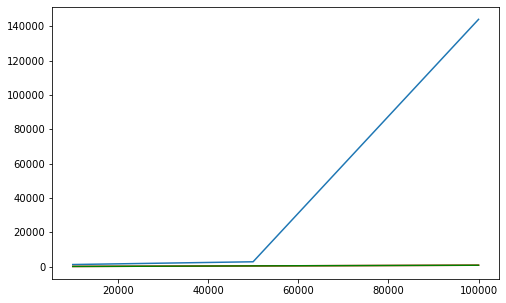

In [21]:
import matplotlib.pyplot as plt

#x = np.linspace(-1, 1, 50)
x = [10000, 50000, 100000]
 = [1190, 2800, 144000]
y2 = [77.4, 400, 789]
y3 = [78.3, 392, 796]

plt.figure(num = 3, figsize=(8, 5))
plt.plot(x, y1)
plt.plot(x, y2, 
         color='red',   

        )
plt.plot(x, y3, color='green')

plt.show()

### ☕  Exos ☕

Vous écrirez un script qui reçoit en argument un fichier csv et un préfixe. Le script renverra tous les mots du fichier qui commencent par ce préfixe.  
Vous pourrez travailler sur `austronesian_swadesh.csv` ou `Lexique383.tsv` par exemple.